- https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data

- https://colab.research.google.com/github/ultralytics/ultralytics/blob/main/examples/tutorial.ipynb

- https://docs.ultralytics.com/ko#where-to-start

In [5]:
import numpy as np

data = np.load("./datasets/strawberry_size/strain_dataset.npy")
print(data)

[[28.5 11.   6.5  5.5]
 [31.5  8.  14.2 10.6]
 [19.2 13.   8.   6.6]
 ...
 [23.1 10.  12.2  9.5]
 [28.  11.  12.   9.5]
 [31.5  9.  13.  10. ]]


In [6]:
len(data)

395

In [8]:
data = np.load("./datasets/strawberry_size/train_dataset.npy")
print(data)

[[[[[ 34  58  24]
    [ 50  73  36]
    [161 193 122]
    ...
    [137 157 105]
    [112 158 105]
    [ 83  96  50]]

   [[206 247 204]
    [120 152  96]
    [138 177 101]
    ...
    [ 60  75  37]
    [ 94 114  69]
    [101 117  68]]

   [[183 225 172]
    [175 226 176]
    [ 82 107  68]
    ...
    [ 66  90  48]
    [104 128  78]
    [ 95 111  60]]

   ...

   [[  0   0   0]
    [  0   0   0]
    [  0   0   0]
    ...
    [145 185 117]
    [148 183 116]
    [144 178 108]]

   [[  0   0   0]
    [  0   0   0]
    [  0   0   0]
    ...
    [104 156  86]
    [108 155  86]
    [119 165  95]]

   [[  0   0   0]
    [  0   0   0]
    [  0   0   0]
    ...
    [ 80 142  72]
    [ 85 145  75]
    [ 86 141  73]]]


  [[[208 237 228]
    [127 154 141]
    [104 134 108]
    ...
    [ 95 109  84]
    [109 119  96]
    [ 61  73  51]]

   [[199 225 207]
    [215 247 232]
    [156 194 176]
    ...
    [ 91 109  82]
    [ 92 111  86]
    [ 80  97  76]]

   [[157 168 138]
    [190 212 188]
    [197 2

In [9]:
data.shape

(395, 10, 64, 64, 3)

In [11]:
sub_array = data[0, 0, ...]
sub_array.shape, sub_array

((64, 64, 3),
 array([[[ 34,  58,  24],
         [ 50,  73,  36],
         [161, 193, 122],
         ...,
         [137, 157, 105],
         [112, 158, 105],
         [ 83,  96,  50]],
 
        [[206, 247, 204],
         [120, 152,  96],
         [138, 177, 101],
         ...,
         [ 60,  75,  37],
         [ 94, 114,  69],
         [101, 117,  68]],
 
        [[183, 225, 172],
         [175, 226, 176],
         [ 82, 107,  68],
         ...,
         [ 66,  90,  48],
         [104, 128,  78],
         [ 95, 111,  60]],
 
        ...,
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [145, 185, 117],
         [148, 183, 116],
         [144, 178, 108]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [104, 156,  86],
         [108, 155,  86],
         [119, 165,  95]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [ 80,

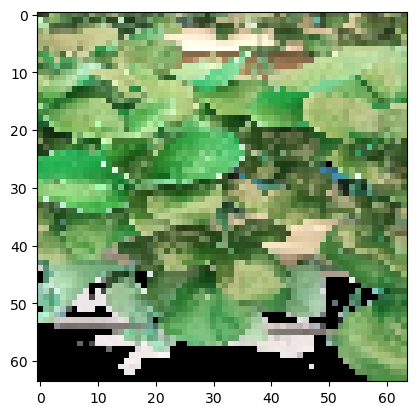

In [12]:
import matplotlib.pyplot as plt

plt.imshow(sub_array)
plt.show()

In [13]:
import numpy as np
import cv2

In [16]:
low_green = np.array([155,0,40])
high_green = np.array([179,165,255])

def detect_leaf(imgfile):

    # img = cv2.imread(imgfile)
    img = imgfile

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # find the green color
    mask_green = cv2.inRange(hsv, (36,0,0), (86,255,255))

    # find the brown color
    # mask_brown = cv2.inRange(hsv, (8, 60, 20), (30, 255, 200))
    # find the yellow and green color in the leaf
    mask_yellow_green = cv2.inRange(hsv, low_green, high_green)
    # find any of the three colors(green or brown or yellow) in the image

    # mask = cv2.bitwise_or(mask_yellow_green, mask_brown)
    mask = cv2.bitwise_or(mask_yellow_green, mask_green)

    # mask = cv2.bitwise_or(mask, mask_yellow_green)
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(img, img, mask=mask)

    cv2.imshow("original", img)
    cv2.imshow("final image", res)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # return res

detect_leaf(sub_array)

In [4]:
data = np.load("./datasets/strawberry_size/wtrain_dataset.npy")
print(data)

[ 72.    9.   42.   25.   52.   13.5  43.   16.   18.    4.   15.   14.
  30.   11.    3.    4.   18.   48.    1.   44.    2.    3.   15.   33.
   4.   11.    2.   19.   24.   22.   11.   11.   36.   15.   69.   50.
  55.   10.   31.  100.    9.   35.   11.    9.   11.   51.   61.   22.
  52.   24.   17.   34.   34.   11.    1.   28.    2.   38.   54.   46.
  13.   10.    3.   26.   46.    4.   23.   35.   22.   33.    8.   27.
  60.   17.   12.   18.   31.   36.   11.   36.    6.5  11.4  12.    8.
  69.   21.   15.   36.    6.   36.   19.    3.   10.   19.   51.   65.
  45.   33.    1.   45.   10.5  18.    8.   24.   26.   56.   27.    5.
 123.   10.   23.   33.   20.   30.   25.   57.   15.    7.    7.   16.
  24.    9.   12.    6.   10.   29.    2.   39.   25.   17.   22.   18.
  49.   23.   32.   10.   74.   19.    6.   21.   25.   30.   63.   32.
   1.    8.6   8.   28.   14.   16.   51.    3.   10.   26.   25.   18.
  82.   33.   17.   50.    6.   35.   16.   19.   14.    7.    7

In [7]:
from pathlib import Path

Path(__file__).resolve(), Path(__file__).resolve().parents

NameError: name '__file__' is not defined

In [31]:
import json

# json 파일 읽기
with open('./datasets/label/C25_B02_004_527115.json', 'r') as f:
    data = json.load(f)

annotations = data['annotations']
categories = data['categories']
annotations, categories

([{'segmentation': [671.16,
    925.62,
    726.02,
    925.62,
    726.02,
    1199.95,
    671.16,
    1199.95],
   'area': 15049.74,
   'bbox': [671.16, 925.62, 54.86, 274.33],
   'isCrowd': 0,
   'id': 0,
   'image_id': 527115,
   'category_id': 0},
  {'segmentation': [526.05,
    735.2,
    771.15,
    735.2,
    771.15,
    897.54,
    526.05,
    897.54],
   'area': 39789.53,
   'bbox': [526.05, 735.2, 245.1, 162.34],
   'isCrowd': 0,
   'id': 1,
   'image_id': 527115,
   'category_id': 1},
  {'segmentation': [272.02,
    868.03,
    325.04,
    868.03,
    325.04,
    921.83,
    272.02,
    921.83],
   'area': 2853.54,
   'bbox': [272.02, 868.03, 53.03, 53.81],
   'isCrowd': 0,
   'id': 2,
   'image_id': 527115,
   'category_id': 2},
  {'segmentation': [354.28,
    1238.44,
    419.73,
    1238.44,
    419.73,
    1296.05,
    354.28,
    1296.05],
   'area': 3771.15,
   'bbox': [354.28, 1238.44, 65.46, 57.61],
   'isCrowd': 0,
   'id': 3,
   'image_id': 527115,
   'category_i

In [36]:
for idx, (anno, cate) in enumerate(zip(annotations, categories)):
    print(idx)
    print(anno, anno['bbox'])
    print(cate, cate['name'])

0
{'segmentation': [671.16, 925.62, 726.02, 925.62, 726.02, 1199.95, 671.16, 1199.95], 'area': 15049.74, 'bbox': [671.16, 925.62, 54.86, 274.33], 'isCrowd': 0, 'id': 0, 'image_id': 527115, 'category_id': 0} [671.16, 925.62, 54.86, 274.33]
{'id': 0, 'name': '줄기', 'supercategory': 'none'} 줄기
1
{'segmentation': [526.05, 735.2, 771.15, 735.2, 771.15, 897.54, 526.05, 897.54], 'area': 39789.53, 'bbox': [526.05, 735.2, 245.1, 162.34], 'isCrowd': 0, 'id': 1, 'image_id': 527115, 'category_id': 1} [526.05, 735.2, 245.1, 162.34]
{'id': 1, 'name': '잎', 'supercategory': 'none'} 잎
2
{'segmentation': [272.02, 868.03, 325.04, 868.03, 325.04, 921.83, 272.02, 921.83], 'area': 2853.54, 'bbox': [272.02, 868.03, 53.03, 53.81], 'isCrowd': 0, 'id': 2, 'image_id': 527115, 'category_id': 2} [272.02, 868.03, 53.03, 53.81]
{'id': 2, 'name': '화방', 'supercategory': 'none'} 화방
3
{'segmentation': [354.28, 1238.44, 419.73, 1238.44, 419.73, 1296.05, 354.28, 1296.05], 'area': 3771.15, 'bbox': [354.28, 1238.44, 65.46, 5

In [38]:
category = ['잎', '줄기', '화방', '과실']

# 라벨 정보 추출
labels = []
for anno, cate in zip(annotations, categories):
    label_info = f"{category.index(cate['name'])} {anno['bbox'][0]} {anno['bbox'][1]} {anno['bbox'][2]} {anno['bbox'][3]}"
    labels.append(label_info)
    print(label_info)

1 671.16 925.62 54.86 274.33
0 526.05 735.2 245.1 162.34
2 272.02 868.03 53.03 53.81
3 354.28 1238.44 65.46 57.61
3 253.84 1141.95 75.91 119.32
3 371.69 1093.46 89.68 136.54
3 193.33 1224.83 96.12 98.53
3 267.55 1273.41 106.72 101.57
3 366.23 1283.28 108.01 109.16


In [ ]:
# class x_center y_center width height
# 0 0.24375 0.36640625 0.21875 0.20546875
# 5 0.24609375 0.63359375 0.35625 0.37578125
# 3 0.6015625 0.4609375 0.2328125 0.33203125
# 4 0.5515625 0.296875 0.1765625 0.1734375
# 2 0.8484375 0.34453125 0.159375 0.26796875

In [39]:
# 텍스트 파일에 라벨 정보 저장
with open('./datasets/label/C25_B02_004_527115.txt', 'w') as f:
    for label in labels:
        f.write(label + '\n')

In [ ]:
# data.yaml

# names:
# - Cocio Cup
# - Cup
# - Halloween cup
# - Hand painted cup
# - White Cup
# - cup
# nc: 6
# roboflow:
#   license: Public Domain
#   project: cup-detection-v2
#   url: https://universe.roboflow.com/nicolai-hoirup-nielsen/cup-detection-v2/dataset/3
#   version: 3
#   workspace: nicolai-hoirup-nielsen
# test: ../test/images
# train: Cup-Detection-v2-3/train/images
# val: Cup-Detection-v2-3/valid/images